### EDA - Mini Project 1

Analysis of Sales Drivers for Courses offered under Category : “Development” in India

Key areas of focus :
- What kind of courses are more popular?
- Which courses are generating highest sales?
- Are prices a factor?
- Does ratings and reviews influence the courses’ sales?


### 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from textwrap import wrap
import ast
import warnings
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
%matplotlib inline
import seaborn as sns
from openpyxl import Workbook

### 2. Dataset
Consists of 20 columns :-

1. id : Course ID of that particular course.
2. title : Unique names of the courses available under the development category
3. url: URL of the course
4. is_paid : Boolean value displaying true if the course is paid and false if otherwise
5. num_subscribers : Number of people who have subscribed that course
6. avg_rating : Average rating of the course
7. avg rating recent : Recent changes in the average rating
8. rating : Rating of the course
9. num_reviews : Number of ratings that a course has received
10. is_wishlisted : Boolean value displaying true if the course is wish listed and false if otherwise
11. num_ published_lectures : Number of lectures the course offers
12. num_ published_ practice_tests : Number of practice tests that a course offers
13. created : Time of creation of the course
14. published_time : Time of publishing the course
15. discounted_ price_amount : The discounted price the course is being offered at
16. discounted_ price_currency : The currency of discounted price the course is being offered at
17. discount_price__price_string : The string counterpart of discount price and currency
18. price_ detail_amount : The original price of the course.
19. price_ detail_currency : The currency of price detail amount for the course
20. price_detail__price_string : The string counterpart of price detail and currency

### 3. Reading the Data

In [2]:
data = pd.read_csv('output_All_Finance__Accounting_p1_p626_R1.csv')
data['title'] = data['title'].convert_dtypes()

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13608 entries, 0 to 13607
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            13608 non-null  int64  
 1   title                         13608 non-null  string 
 2   url                           13608 non-null  object 
 3   is_paid                       13608 non-null  bool   
 4   num_subscribers               13608 non-null  int64  
 5   avg_rating                    13608 non-null  float64
 6   avg_rating_recent             13608 non-null  float64
 7   rating                        13608 non-null  float64
 8   num_reviews                   13608 non-null  int64  
 9   is_wishlisted                 13608 non-null  bool   
 10  num_published_lectures        13608 non-null  int64  
 11  num_published_practice_tests  13608 non-null  int64  
 12  created                       13608 non-null  object 
 13  p

In [4]:
data.head()

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
0,762616,The Complete SQL Bootcamp 2020: Go from Zero t...,/course/the-complete-sql-bootcamp/,True,295509,4.66019,4.67874,4.67874,78006,False,84,0,2016-02-14T22:57:48Z,2016-04-06T05:16:11Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
1,937678,Tableau 2020 A-Z: Hands-On Tableau Training fo...,/course/tableau10/,True,209070,4.58956,4.60015,4.60015,54581,False,78,0,2016-08-22T12:10:18Z,2016-08-23T16:59:49Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
2,1361790,PMP Exam Prep Seminar - PMBOK Guide 6,/course/pmp-pmbok6-35-pdus/,True,155282,4.59491,4.59326,4.59326,52653,False,292,2,2017-09-26T16:32:48Z,2017-11-14T23:58:14Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
3,648826,The Complete Financial Analyst Course 2020,/course/the-complete-financial-analyst-course/,True,245860,4.54407,4.53772,4.53772,46447,False,338,0,2015-10-23T13:34:35Z,2016-01-21T01:38:48Z,455.0,INR,₹455,8640.0,INR,"₹8,640"
4,637930,An Entire MBA in 1 Course:Award Winning Busine...,/course/an-entire-mba-in-1-courseaward-winning...,True,374836,4.47080,4.47173,4.47173,41630,False,83,0,2015-10-12T06:39:46Z,2016-01-11T21:39:33Z,455.0,INR,₹455,8640.0,INR,"₹8,640"


In [5]:
data.describe()

,id,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount
count,1.360800e+04,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,13608.000000,12205.000000,13111.000000
mean,1.681721e+06,2847.010435,3.923293,3.912242,3.912242,243.169827,32.224794,0.110523,493.943794,4646.992602
std,9.539271e+05,9437.865634,1.031304,1.039237,1.039237,1580.965895,42.766911,0.623501,267.827260,3109.101019
min,2.762000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,455.000000,1280.000000
25%,8.580862e+05,62.000000,3.800000,3.787315,3.787315,7.000000,12.000000,0.000000,455.000000,1600.000000
50%,1.623421e+06,533.000000,4.194440,4.181735,4.181735,24.000000,21.000000,0.000000,455.000000,3200.000000
75%,2.503720e+06,2279.500000,4.450000,4.452105,4.452105,87.000000,37.000000,0.000000,455.000000,8640.000000
max,3.486006e+06,374836.000000,5.000000,5.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000


### 4. Cleaning and Transforming the Data

In [6]:
data.isnull().sum()

id                                 0
title                              0
url                                0
is_paid                            0
num_subscribers                    0
avg_rating                         0
avg_rating_recent                  0
rating                             0
num_reviews                        0
is_wishlisted                      0
num_published_lectures             0
num_published_practice_tests       0
created                            0
published_time                     0
discount_price__amount          1403
discount_price__currency        1403
discount_price__price_string    1403
price_detail__amount             497
price_detail__currency           497
price_detail__price_string       497
dtype: int64

#### - Check if a course is paid but has a price of 0

In [7]:
((data['is_paid']) & (data['price_detail__amount']).isna()).sum()

1

#### - Finding the course which has invalid price entry and drop row

In [8]:
data[data['is_paid'] & data['price_detail__amount'].isna()]

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
13607,2935720,Acabou a Previdência e agora? - Volume 03,/course/acabou-a-previdencia-e-agora-volume-03/,True,0,0.0,0.0,0.0,0,False,14,0,2020-03-30T19:10:58Z,2020-04-02T16:33:32Z,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data = data.drop(index=[13607])

#### - Check if a course is free but has a price

In [10]:
((data['is_paid']== 'False') & (data['price_detail__amount']).notna()).sum()

0

#### - Finding the number of courses where reviews count is greater than subscribers count

In [11]:
reviews_subscribers = (data['num_reviews'] > data['num_subscribers'])
reviews_subscribers.sum()

5

In [12]:
data[reviews_subscribers]

,id,title,url,is_paid,num_subscribers,avg_rating,avg_rating_recent,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,created,published_time,discount_price__amount,discount_price__currency,discount_price__price_string,price_detail__amount,price_detail__currency,price_detail__price_string
10898,2542935,Learn the truth about wealth creation,/course/truth-about-wealth-creation/,True,0,3.00,3.00000,3.00000,1,False,12,0,2019-09-04T08:01:03Z,2019-09-11T00:23:58Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
10950,3106416,Series 7 tests by topic + Full Exam,/course/series-7-tests/,True,0,5.00,5.00000,5.00000,1,False,0,6,2020-05-09T03:22:29Z,2020-05-17T20:37:30Z,NaN,NaN,NaN,2240.0,INR,"₹2,240"
12905,3149864,Planilha Pronta - Conciliação Bancária,/course/planilha-pronta-conciliacao-bancaria/,True,0,2.75,3.19403,3.19403,2,False,0,2,2020-05-20T12:44:32Z,2020-05-20T14:27:28Z,455.0,INR,₹455,1280.0,INR,"₹1,280"
12942,2781114,Elaboración y análisis de Conciliación contabl...,/course/elaboracion-y-analisis-de-conciliacion...,True,1,2.50,2.50000,2.50000,2,False,8,0,2020-01-27T04:12:34Z,2020-01-28T02:28:45Z,NaN,NaN,NaN,1600.0,INR,"₹1,600"
13049,3428016,Forex MasterClass de Cero a Avanzado- Ejemplos...,/course/forex-masterclass-de-cero-a-avanzado-e...,True,0,5.00,5.00000,5.00000,1,False,13,0,2020-08-17T23:59:30Z,2020-08-21T21:34:31Z,NaN,NaN,NaN,12800.0,INR,"₹12,800"


In [13]:
a=data[reviews_subscribers].index.tolist()
a

[10898, 10950, 12905, 12942, 13049]

#### - Deleting invalid courses

In [14]:
data1 = data.drop(index=a)

#### - Resetting the dataframe indices

In [15]:
data1 = data1.reset_index(drop=True)

In [16]:
data1.shape

(13602, 20)

#### - Check for similar columns to drop

In [17]:
data1[['avg_rating', 'avg_rating_recent', 'rating']].sample(10)

,avg_rating,avg_rating_recent,rating
1635,4.26804,4.26879,4.26879
7720,4.00000,4.04234,4.04234
8492,3.50000,3.41015,3.41015
5399,4.30000,4.13959,4.13959
9075,2.25000,2.10604,2.10604
7036,3.85000,3.67451,3.67451
75,4.19608,4.14233,4.14233
13115,5.00000,5.00000,5.00000
5066,4.30000,4.30445,4.30445
1436,3.76667,3.77874,3.77874


#### - Verifying if 'avg_rating_recent' and 'rating' columns contain the same values 

In [18]:
(data1['avg_rating_recent'] == data1['rating']).sum()

13602

#### - Similar column to drop

In [19]:
data1['avg_rating'].corr(data1['avg_rating_recent'])

0.9892139804200228

### 5. Feature Engineering and Selection

#### - Adding a published year column from published time

In [20]:
data1['Published Year']=pd.to_datetime(data['published_time'], errors='coerce').dt.year
data1['Published Year'] = data1['Published Year'].astype(int)

#### - For courses title contain '2020' to update published year

In [21]:
# data1.loc[data1['Published Year'][data1.title.str.contains('2020')]]
data1.loc[data1['title'].str.contains('2020'), 'Published Year'] = 2020

#### - Checking Currency = INR

In [22]:
print(data1.groupby('is_paid')['price_detail__currency'].unique())

is_paid
False    [nan]
True     [INR]
Name: price_detail__currency, dtype: object


#### - Fill empty cells with '0'

In [23]:
data1.loc[data1["discount_price__amount"] == ''] = np.NaN
data1["discount_price__amount"].fillna(0, inplace=True)

In [24]:
data1.loc[data1["price_detail__amount"] == ''] = np.NaN
data1["price_detail__amount"].fillna(0, inplace=True)

#### - Set USD @ 0.013 for reporting to USA and Total USD Sales Amount

In [25]:
data1.dtypes

id                              float64
title                            string
url                              object
is_paid                          object
num_subscribers                 float64
avg_rating                      float64
avg_rating_recent               float64
rating                          float64
num_reviews                     float64
is_wishlisted                    object
num_published_lectures          float64
num_published_practice_tests    float64
created                          object
published_time                   object
discount_price__amount          float64
discount_price__currency         object
discount_price__price_string     object
price_detail__amount            float64
price_detail__currency           object
price_detail__price_string       object
Published Year                  float64
dtype: object

In [26]:
data1['price_detail_USD'] = round(data1['price_detail__amount']*0.013,1)
data1['discount_price_USD'] = round(data1['discount_price__amount']*0.013,1)
data1['price_detail_USD__amount'] = round((data1['price_detail__amount']-data1['discount_price__amount'])*0.013,1)
data1['Total_USD_amount'] = data1['price_detail_USD__amount'] * data1['num_subscribers']

#### - Drop Columns after cleanup and delete 'discount_priceprice_string' and 'price_detailprice_string' as they are the string counterparts of 'discount_priceamount' and 'price_detailamount' and other columns

In [27]:
data1 = data1.drop(['id', 'url','avg_rating','avg_rating_recent','created','discount_price__price_string','price_detail__price_string'], axis=1)

In [28]:
data1['Published Year'] = data1['Published Year'].astype(str).apply(lambda x: x.replace('.0',''))

In [29]:
data1.head()

,title,is_paid,num_subscribers,rating,num_reviews,is_wishlisted,num_published_lectures,num_published_practice_tests,published_time,discount_price__amount,discount_price__currency,price_detail__amount,price_detail__currency,Published Year,price_detail_USD,discount_price_USD,price_detail_USD__amount,Total_USD_amount
0,The Complete SQL Bootcamp 2020: Go from Zero t...,True,295509.0,4.67874,78006.0,False,84.0,0.0,2016-04-06T05:16:11Z,455.0,INR,8640.0,INR,2020,112.3,5.9,106.4,31442157.6
1,Tableau 2020 A-Z: Hands-On Tableau Training fo...,True,209070.0,4.60015,54581.0,False,78.0,0.0,2016-08-23T16:59:49Z,455.0,INR,8640.0,INR,2020,112.3,5.9,106.4,22245048.0
2,PMP Exam Prep Seminar - PMBOK Guide 6,True,155282.0,4.59326,52653.0,False,292.0,2.0,2017-11-14T23:58:14Z,455.0,INR,8640.0,INR,2017,112.3,5.9,106.4,16522004.8
3,The Complete Financial Analyst Course 2020,True,245860.0,4.53772,46447.0,False,338.0,0.0,2016-01-21T01:38:48Z,455.0,INR,8640.0,INR,2020,112.3,5.9,106.4,26159504.0
4,An Entire MBA in 1 Course:Award Winning Busine...,True,374836.0,4.47173,41630.0,False,83.0,0.0,2016-01-11T21:39:33Z,455.0,INR,8640.0,INR,2016,112.3,5.9,106.4,39882550.4


In [30]:
data1.describe()

,num_subscribers,rating,num_reviews,num_published_lectures,num_published_practice_tests,discount_price__amount,price_detail__amount,price_detail_USD,discount_price_USD,price_detail_USD__amount,Total_USD_amount
count,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,13602.000000,1.360200e+04
mean,2848.266211,3.912593,243.276577,32.235554,0.109984,443.146155,4477.835612,58.199294,5.748640,52.444052,1.960805e+05
std,9439.757679,1.038723,1581.306400,42.773098,0.621376,294.751974,3173.133155,41.251949,3.831273,40.763855,8.885653e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,62.000000,3.788030,7.000000,12.000000,0.000000,455.000000,1280.000000,16.600000,5.900000,14.900000,1.460150e+03
50%,534.000000,4.181950,24.000000,21.000000,0.000000,455.000000,3200.000000,41.600000,5.900000,35.700000,1.377610e+04
75%,2281.750000,4.452095,87.000000,37.000000,0.000000,455.000000,8640.000000,112.300000,5.900000,103.200000,9.516342e+04
max,374836.000000,5.000000,78006.000000,699.000000,6.000000,3200.000000,12800.000000,166.400000,41.600000,166.400000,3.988255e+07


### 6. Correlation

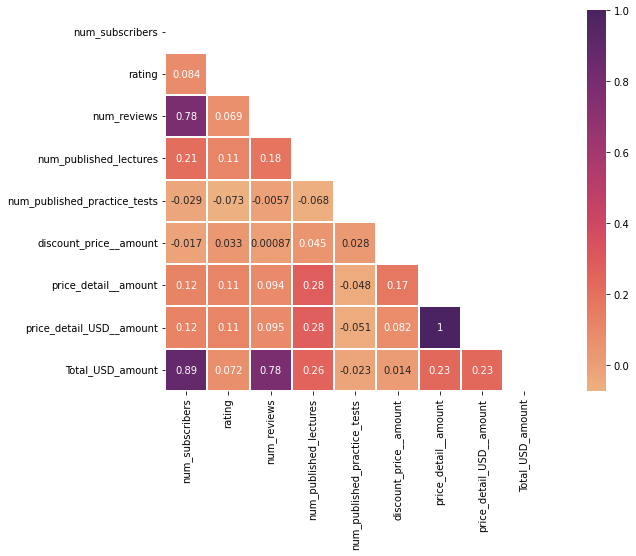

In [31]:
plt.figure(figsize = (15, 7))
mask = np.zeros_like(data1[['num_subscribers','rating','num_reviews','num_published_lectures',
                            'num_published_practice_tests','discount_price__amount','price_detail__amount',
                            'Published Year','price_detail_USD__amount','Total_USD_amount']].corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
    data1[['num_subscribers','rating','num_reviews','num_published_lectures','num_published_practice_tests',
           'discount_price__amount','price_detail__amount','Published Year','price_detail_USD__amount',
           'Total_USD_amount']].corr(),
    mask = mask,
    linewidths = 0.1,
    vmax = 1.0,
    square = True,
    cmap = "flare",
    linecolor = 'white',
    annot = True,
)
plt.show()

### 7. Exploratory Data Analysis

In [32]:
b=data1.groupby(['Published Year'])['Total_USD_amount'].sum().reset_index()
# b['Published Year'] = b['Published Year'].astype(str).apply(lambda x: x.replace('.0',''))
# b['Published Year'].set_option('precision', 0)
print(b)

   Published Year  Total_USD_amount
0            2010           61689.6
1            2011         1720214.4
2            2012         5207564.9
3            2013        63650194.2
4            2014       193991205.6
5            2015       348766761.5
6            2016       387545017.0
7            2017       482387186.0
8            2018       419059314.3
9            2019       283510790.1
10           2020       481186638.2


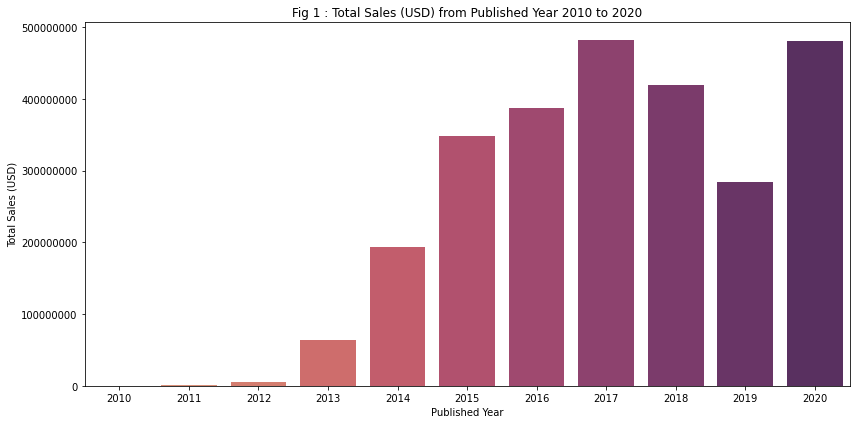

In [33]:
plt.figure(figsize=(12,6))
ax = sns.barplot(x="Published Year", y="Total_USD_amount", data=b, palette="flare",ci=None)
ax.set(xlabel='Published Year', ylabel='Total Sales (USD)')
plt.ticklabel_format(style='plain', axis='y')
# ax.xaxis.set_major_formatter(FormatStrFormatter('$%.0f'))
plt.title('Fig 1 : Total Sales (USD) from Published Year 2010 to 2020')
plt.tight_layout()
# plt.savefig('Fig 1.png',bbox_inches='tight',facecolor='white', transparent=False)
plt.show()


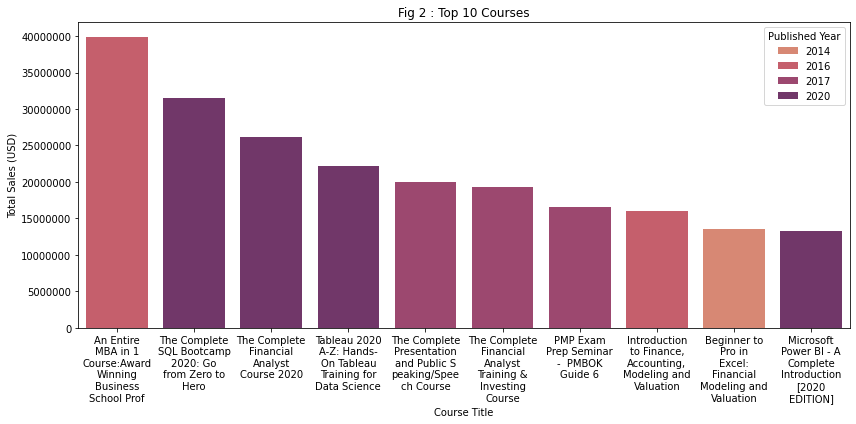

In [50]:
data1_top10_sales=data1.nlargest(10, "Total_USD_amount")
fig2 = plt.figure(figsize=(12,6))
ax2 = fig2.add_subplot(111)
bar1=sns.barplot(x='title',y="Total_USD_amount",data=data1_top10_sales,ax=ax2,palette='flare',hue='Published Year',dodge=False,hue_order = ['2014','2016','2017','2020'])
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Course Title')
plt.ylabel('Total Sales (USD)')
plt.title('Fig 2 : Top 10 Courses')
labels = data1_top10_sales['title']
labels = ['\n'.join(wrap(l,12)) for l in labels]
plt.xticks([0,1,2,3,4,5,6,7,8,9],labels)
# ax.set_xticklabels(labels)
# plt.xticks(10,[textwrap.fill[data1_top10['title']]],rotation = 10, fontsize=8, horizontalalignment="center")
# ax1.set_xticklabels(data1_top10['title'],wrap=True)
# ax1.set_xticklabels([textwrap.fill(e, 7) for e in data1_top10['Total_USD_amount'].head()])
plt.tight_layout()
# plt.savefig('Fig 2.png',bbox_inches='tight',facecolor='white', transparent=False)
plt.show()


In [35]:
# c=data1.nlargest(10, "Total_USD_amount")

In [51]:
# plt.figure(figsize=(12,6))
# # ax2 = fig2.add_subplot(111)
# bar1=sns.catplot(x="title", y="Total_USD_amount", hue="Published Year", kind="bar", data=c, 
#                 palette = 'flare',dodge=False, hue_order = ['2014','2016','2017','2020'])
# # sns.set(rc={'figure.figsize':(40,1000)})
# # bar1.fig.set_size_inches(60,20)
# plt.rcParams['figure.figsize']=(40,20)
# plt.ticklabel_format(style='plain', axis='y')

In [37]:
e=data1.groupby(['Published Year','is_paid'])['num_subscribers'].sum().reset_index()
print(e)

   Published Year  is_paid  num_subscribers
0            2010     True           2268.0
1            2011     True          25558.0
2            2012    False           4781.0
3            2012     True         115165.0
4            2013    False         148098.0
5            2013     True        1182114.0
6            2014    False         159904.0
7            2014     True        2605468.0
8            2015    False         168829.0
9            2015     True        4794014.0
10           2016    False         330766.0
11           2016     True        5255673.0
12           2017    False         534597.0
13           2017     True        5991177.0
14           2018    False         487685.0
15           2018     True        5582681.0
16           2019    False         650932.0
17           2019     True        3926921.0
18           2020    False         421606.0
19           2020     True        6353880.0


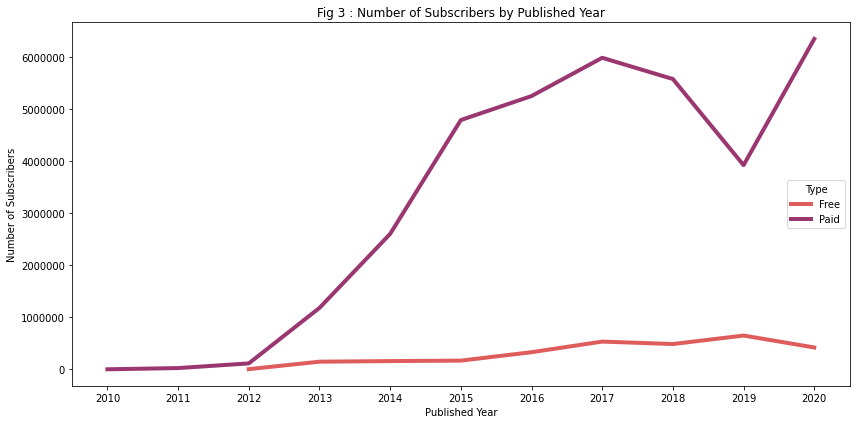

In [38]:
# data1.groupby('num_subscribers')['year']
fig3 = plt.figure(figsize=(12,6))
ax3 = fig3.add_subplot(111)
bar3 = sns.lineplot(data=e, x="Published Year", y='num_subscribers', hue="is_paid", palette='flare',linewidth = 4)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Published Year')
plt.ylabel('Number of Subscribers')
plt.legend(title='Type', loc='center right', labels=['Free','Paid'])
plt.title('Fig 3 : Number of Subscribers by Published Year')
plt.tight_layout()
plt.savefig('Fig 3.png',bbox_inches='tight',facecolor='white', transparent=False)
plt.show()


In [39]:
f=data1.groupby(['Published Year','is_paid'])['num_subscribers'].count().reset_index()
print(f)

   Published Year  is_paid  num_subscribers
0            2010     True                1
1            2011     True                9
2            2012    False                1
3            2012     True               67
4            2013    False               12
5            2013     True              338
6            2014    False               11
7            2014     True              669
8            2015    False               16
9            2015     True             1387
10           2016    False               27
11           2016     True             1218
12           2017    False               58
13           2017     True             1781
14           2018    False               93
15           2018     True             2504
16           2019    False               94
17           2019     True             2308
18           2020    False              184
19           2020     True             2824


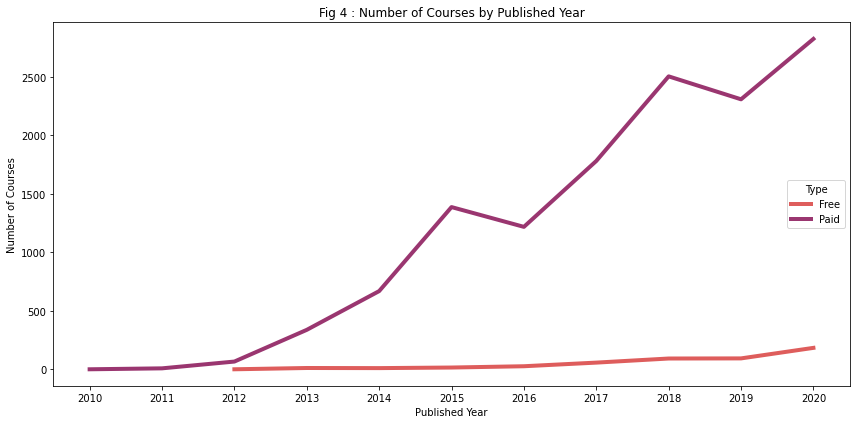

In [40]:
fig4 = plt.figure(figsize=(12,6))
ax4 = fig4.add_subplot(111)
bar4 = sns.lineplot(data=f, x="Published Year", y='num_subscribers', hue="is_paid", palette='flare',linewidth = 4)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Published Year')
plt.ylabel('Number of Courses')
plt.legend(title='Type', loc='center right', labels=['Free','Paid'])
plt.title('Fig 4 : Number of Courses by Published Year')
plt.tight_layout()
# plt.savefig('Fig 4.png',bbox_inches='tight',facecolor='white', transparent=False)
plt.show()


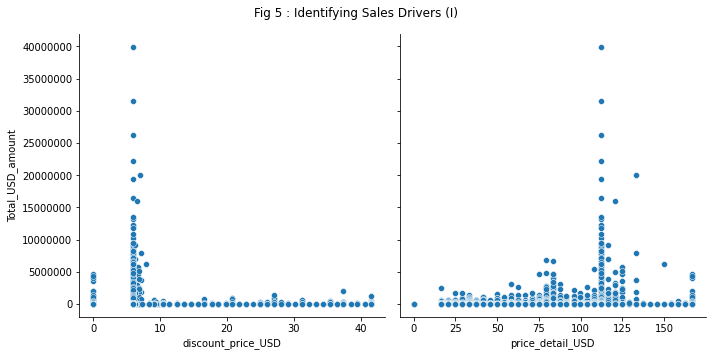

In [41]:
bar5=sns.pairplot(data=data1,
                  y_vars=['Total_USD_amount',],
                  x_vars=['discount_price_USD','price_detail_USD'],height=5,
                  palette=sns.color_palette('flare'))
plt.ticklabel_format(style='plain', axis='y')
bar5.fig.suptitle('Fig 5 : Identifying Sales Drivers (I)')
plt.tight_layout()
# plt.savefig('Fig 5.png',bbox_inches='tight',facecolor='white', transparent=False)
plt.show()

In [42]:
g=data1.groupby('Published Year')['price_detail_USD'].mean().reset_index()
print(g)

   Published Year  price_detail_USD
0            2010         33.300000
1            2011         45.733333
2            2012         41.897059
3            2013         47.782571
4            2014         50.169118
5            2015         56.554383
6            2016         59.776225
7            2017         62.324850
8            2018         62.232191
9            2019         60.555329
10           2020         53.869847


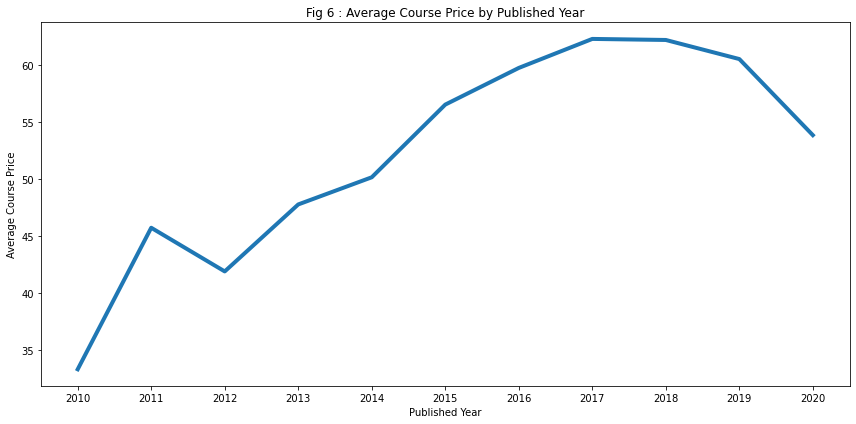

In [54]:
fig6 = plt.figure(figsize=(12,6))
ax6 = fig6.add_subplot(111)
bar6 = sns.lineplot(data=g, x="Published Year", y='price_detail_USD', palette='flare',linewidth = 4)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Published Year')
plt.ylabel('Average Course Price')
# plt.legend(title='Type', loc='upper left', labels=['Free','Paid'])
plt.title('Fig 6 : Average Course Price by Published Year')

# plt.plot([2017],[63],'o', ms=28, mec='r', mfc='none')
plt.tight_layout()
# plt.savefig('Fig 6.png',bbox_inches='tight',facecolor='white', transparent=False)
plt.show()


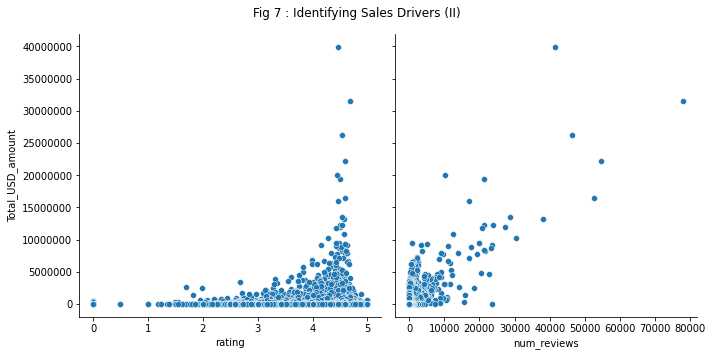

In [44]:
bar7=sns.pairplot(data=data1,
                  y_vars=['Total_USD_amount',],
                  x_vars=['rating','num_reviews'],height=5,palette='flare')
plt.ticklabel_format(style='plain', axis='y')
bar7.fig.suptitle('Fig 7 : Identifying Sales Drivers (II)')
plt.tight_layout()
# plt.savefig('Fig 7.png',bbox_inches='tight',facecolor='white', transparent=False)
plt.show()

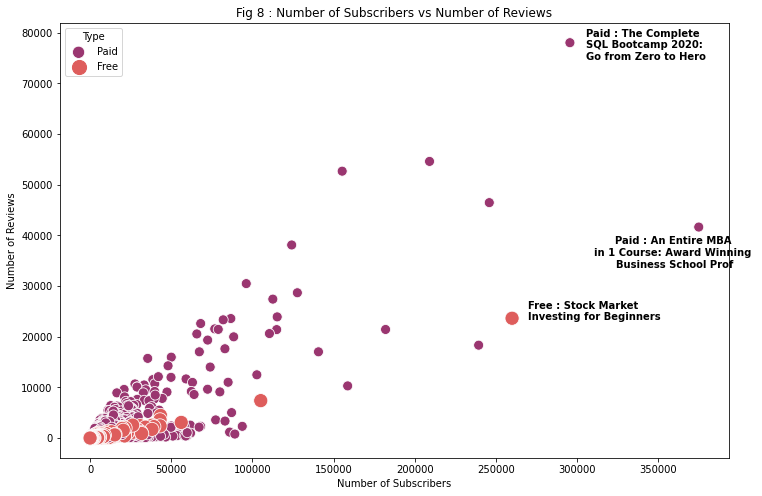

In [45]:
fig8 =plt.figure(figsize=(12,8))
ax8 = sns.scatterplot(x='num_subscribers', y='num_reviews', data=data1,hue='is_paid',size='is_paid',sizes=(100, 200),palette='flare')
plt.legend(title='Type', loc='upper left', labels=['Paid','Free'])
plt.xlabel('Number of Subscribers')
plt.ylabel('Number of Reviews')
plt.title('Fig 8 : Number of Subscribers vs Number of Reviews')
plt.text(259888+10000, 23635, "Free : Stock Market \nInvesting for Beginners", horizontalalignment='left', size='medium', color='black', weight='semibold',wrap = True)
plt.text(295509+10000, 75000, "Paid : The Complete \nSQL Bootcamp 2020: \nGo from Zero to Hero", horizontalalignment='left', size='medium', color='black', weight='semibold',wrap = True)
plt.text(350000+10000, 34000, "Paid : An Entire MBA \nin 1 Course: Award Winning \nBusiness School Prof", horizontalalignment='center', size='medium', color='black', weight='semibold',wrap = True)
# plt.tight_layout()
# plt.savefig('Fig 8.png',bbox_inches='tight',facecolor='white', transparent=False)
plt.show()


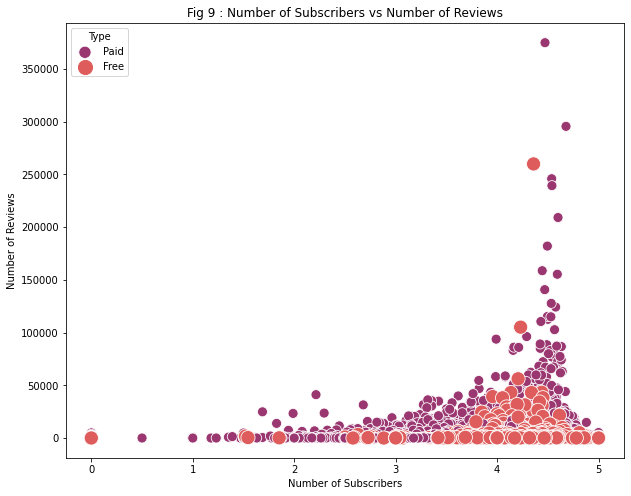

In [46]:
fig9 =plt.figure(figsize=(10,8))
ax9 = sns.scatterplot(x='rating', y='num_subscribers', data=data1,hue='is_paid',size='is_paid',sizes=(100, 200),palette='flare')
plt.legend(title='Type', loc='upper left', labels=['Paid','Free'])
plt.xlabel('Number of Subscribers')
plt.ylabel('Number of Reviews')
plt.title('Fig 9 : Number of Subscribers vs Number of Reviews')
# plt.savefig('Fig 9.png')
plt.show()


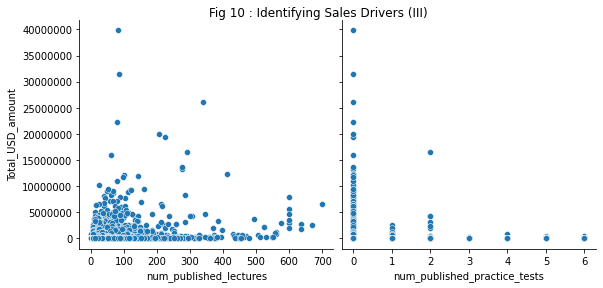

In [47]:
bar10=sns.pairplot(data=data1,
                  y_vars=['Total_USD_amount',],
                  x_vars=['num_published_lectures','num_published_practice_tests'],height=4,palette='flare')
plt.ticklabel_format(style='plain', axis='y')
# plt.title('Fig 4 : Identifying Sales Drivers')
bar10.fig.suptitle('Fig 10 : Identifying Sales Drivers (III)')
# plt.savefig('Fig 10.jpg')
plt.show()

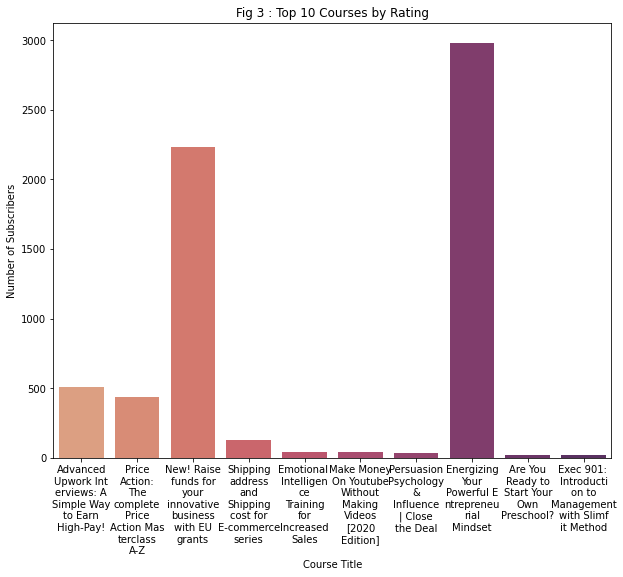

In [48]:
data1_top10_rating = data1.nlargest(10, "rating")
fig10 = plt.figure(figsize=(10,8))
ax10 = fig10.add_subplot(111)
bar10=sns.barplot(x='title',y="num_subscribers",data=data1_top10_rating,ax=ax10,palette='flare')
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Course Title')
plt.ylabel('Number of Subscribers')
plt.title('Fig 3 : Top 10 Courses by Rating')
labels = data1_top10_rating['title']
labels = ['\n'.join(wrap(l,10)) for l in labels]
plt.xticks([0,1,2,3,4,5,6,7,8,9],labels)
plt.show()

### 8. References
- [Kaggle](https://www.kaggle.com/jilkothari/finance-accounting-courses-udemy-13k-course) Project Data Source